##Proceso de modelado calificación crediticia (Credit Scoring)
Comenzamos importando las librerías basicas para el desarrollo de nuestro modelo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import constants

Tenemos una base de datos que nos muestra datos de una muestra de clientes en un banco que cuentan con una tarjeta de credito, podemos ver el ID, apellido, calificación crediticia, ubicación, genero, edad, su antiguedad (en años) con el banco, la cantidad de dinero que tienen guardada, los "productos" que tienen con el banco, si tienen tarjeta de credito, si es un miembro activo, salario estimado y los días de retraso que tienen a la fecha de pago de la tarjeta.

Vamos  cargar la base de datos y ver un poco de información importante

In [ ]:
file = '/content/churn.csv'
Credscor=pd.read_csv(file,sep=",")
Credscor

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,delay
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,9
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,5
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,16
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,15
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,15
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,33
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,11
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,15


In [ ]:
Credscor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  delay            10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


No hay datos nulos en nuestro base lo que hara mas facil su manejo

In [ ]:
Credscor.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'delay'],
      dtype='object')

Como explicamos antes, estas son las variables de la base:
* RowNumber: Numero de fila
* CustomerId: Id de el cliente
* Surname: Apellido
* CreditScore: calificación crediticia
* Geography: País donde viven
* Gender: Genero (masculino/femenino)
* Age: Edad
* Tenure: Años que tienen de ser clientes con el banco
* Balance: Cantidad promedio de dinero que tienen guardado en el banco
* NumOfProducts: Número de "productos" que manejan con el banco
* HasCrCard: Si tienen tarjeta de credito o no (Aquí tenemos un valor unico pues la base de datos es solo de clientes que tienen tarjeta de credito)
* IsActiveMember: Si aun son miembros activos
* EstimatedSalary: Salario estimado del cliente
* Exited: Si es probable o no que el cliente deje de usar su cuenta
* Delay: Los días de atraso de un cliente al pagar







In [ ]:
Credscor.describe().round(1)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,delay
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,5000.5,15690940.6,650.5,38.9,5.0,76485.9,1.5,0.7,0.5,100090.2,0.2,25.8
std,2886.9,71936.2,96.7,10.5,2.9,62397.4,0.6,0.5,0.5,57510.5,0.4,27.6
min,1.0,15565701.0,350.0,18.0,0.0,0.0,1.0,0.0,0.0,11.6,0.0,0.0
25%,2500.8,15628528.2,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.1,0.0,7.0
50%,5000.5,15690738.0,652.0,37.0,5.0,97198.5,1.0,1.0,1.0,100193.9,0.0,14.0
75%,7500.2,15753233.8,718.0,44.0,7.0,127644.2,2.0,1.0,1.0,149388.2,0.0,38.0
max,10000.0,15815690.0,850.0,92.0,10.0,250898.1,4.0,1.0,1.0,199992.5,1.0,100.0


Información importante que podemos ver es que la edad esta entre 18 y 92 años, la
antiguedad va desde clientes nuevos hasta +10 años, hay personas que no tienen nada de dinero en la cuenta, en promedio se manejan casi \$75,000 hasta un máximo de \$250,00, el maximo de productos que un cliente tiene son 4 y el máximo de días que se tienen sin pagar son 100

## **Análisis cuantitativo de los datos**

<ipython-input-6-5fc50b24e381>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  Credscor.hist(ax = ax)


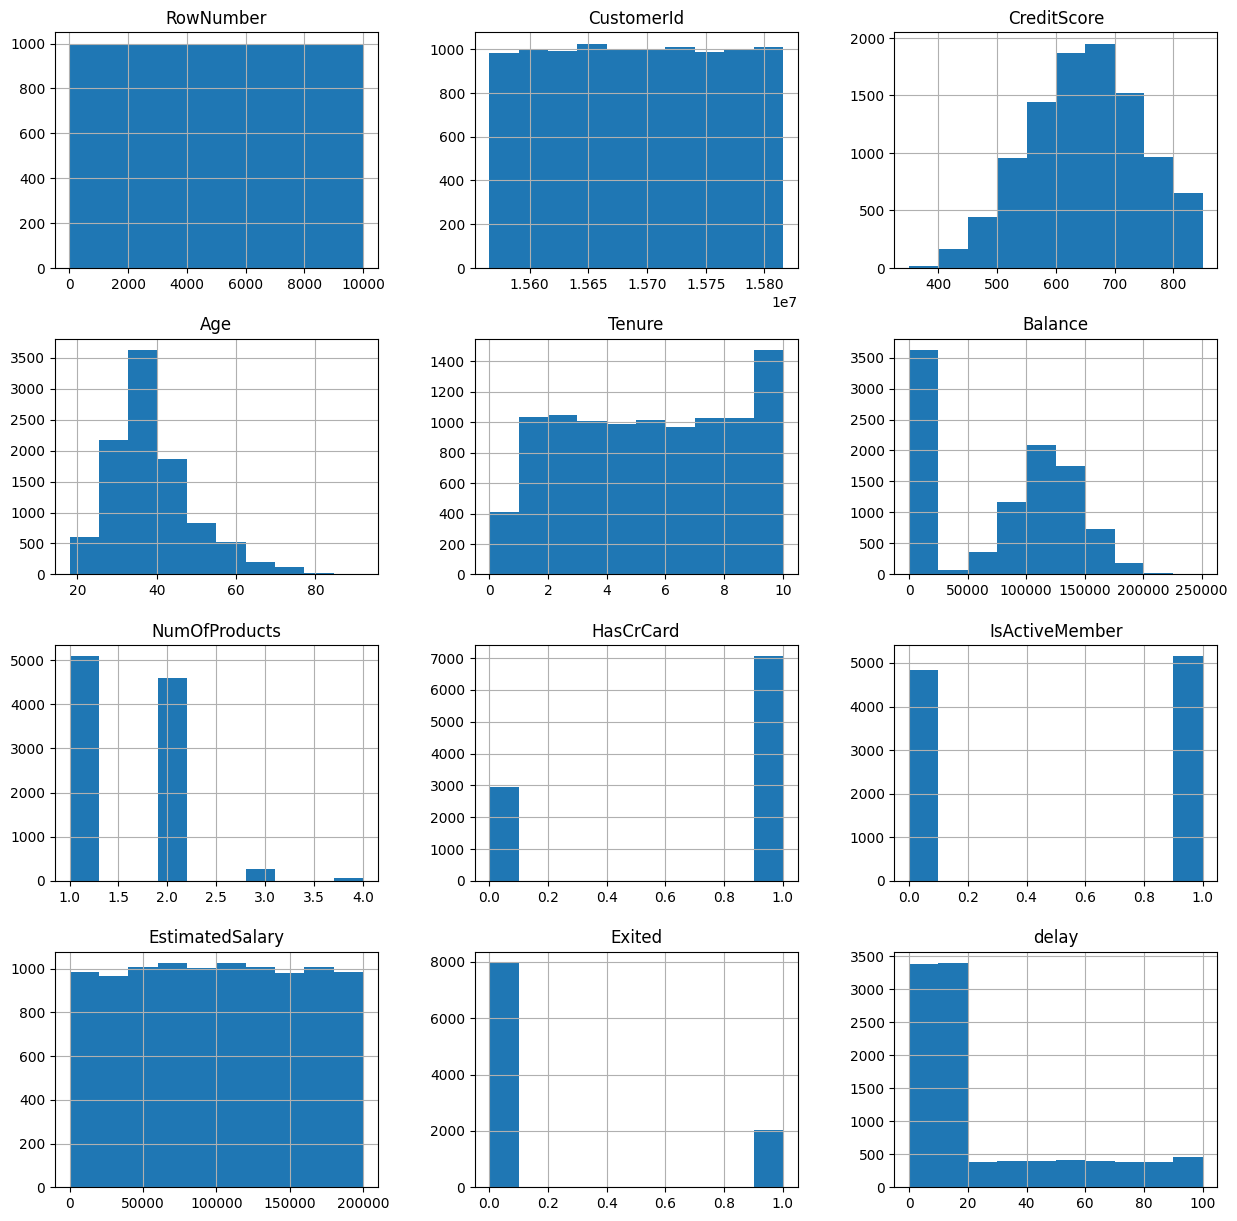

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
Credscor.hist(ax = ax)
plt.show()

Los primeros dos histogramas no nos dicen mucho pues esos son datos categoricos con valor unico para cada cliente, para la calificación crediticia se tiene una distribución parecida a la normal donde los datos se centran en 600-700, la edad se centra en los 30-40 años, para la antiguedad los valores son muy similares para casi todos los años con excepción de los clientes que tienen 10 y 0.

El balance es interesante puesto que los datos parece que siguen una distribución normal pero hay demasiadas personas que tienen su cuenta vacia, despues la mayoria de las personas cuentan con 1 o 2 productos y luego podemos ver que casi la mitad no son miembros activos. El salario esta practimamente distribuido igual con valores entre \$0 y $200,000, y para los días de atraso, la mayoria de los valores son menores a 25, aunque tambien hay algunos otros con un máximo de 200.

## **Análisis cualitativo de los datos**

In [ ]:
Credscor.select_dtypes(include=["object"]).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
Credscor.groupby('Geography').size().sort_values()

Geography
Spain      2477
Germany    2509
France     5014
dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

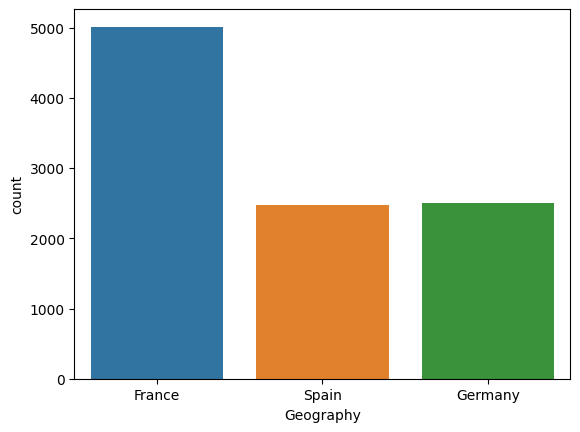

In [ ]:
sns.countplot(x="Geography", data=Credscor)


Los clientes son de España, Francia y Alemania, la mayoría de ellos Franceses

In [ ]:
Credscor.groupby('Gender').size().sort_values()

Gender
Female    4543
Male      5457
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

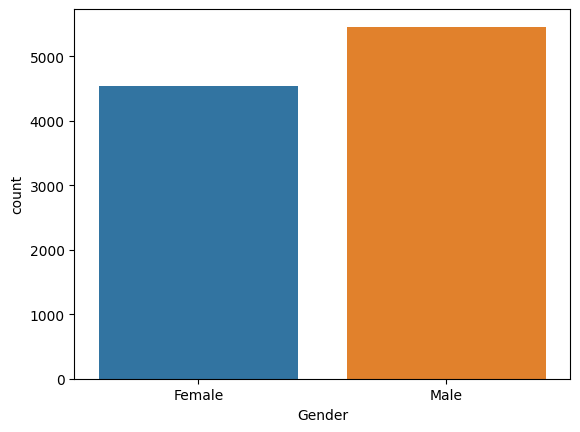

In [ ]:
sns.countplot(x="Gender", data=Credscor)

Aquí podemos ver que la mayoría de los clientes son hombres.

##Datos nulos

In [ ]:
from statistics import mode

In [ ]:
Credscor.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
delay              0
dtype: int64

Afortunadamente no tenemos datos nulos, por lo tanto en este caso no es necesario realizar alguna acción.

##Transformación de datos
Vamos a ver que datos tenemos como cualitativos y etiquetarlos para poder trabajar con ellos cuando sea necesario.

In [ ]:
Credscor.select_dtypes(include = ["object"]).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
Credscor["Geography"].unique().tolist()

['France', 'Spain', 'Germany']

Ahora crearemos una función para sustituir los datos por valores númericos

In [ ]:
def cod_Geograhpy(Geography): #Creamos una función llamada Geography, donde 0 sera Francia, 1 España y 2 Alemania
    if Geography == 'France':
        return 0
    elif Geography == 'Spain':
        return 1
    elif Geography == 'Germany':
        return 2

Credscor["Geography"] = Credscor["Geography"].apply(lambda x: cod_Geograhpy(x))
Credscor.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,delay
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1,9
1,2,15647311,Hill,608,1,Female,41,1,83807.86,1,0,1,112542.58,0,5
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1,16
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0,15
4,5,15737888,Mitchell,850,1,Female,43,2,125510.82,1,1,1,79084.10,0,5


In [ ]:
#Ahora lo haremos para el género
Credscor["Gender"].unique().tolist()

['Female', 'Male']

In [ ]:
def cod_Gender(Gender): #En esta función clasificaremos con 0 mujer y 1 para hombre
    if Gender == 'Female':
        return 0
    elif Gender == 'Male':
        return 1

Credscor["Gender"] = Credscor["Gender"].apply(lambda x: cod_Gender(x))
Credscor.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,delay
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,9
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0,5
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,16
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,15
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0,5


In [ ]:
Credscor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  delay            10000 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.1+ MB


Así podemos ver que la única variable que queda como objeto es "Surname", pero en realidad esa variable no sera util para el desarrollo del modelo

## Definición de TARGET
Crearemos una función que nos ayudara a ver que cleintes tendremos en "target", esto quiere decir que superan el límite de días que la entidad se puede permitir que tengan sin pagar, esto depende mucho de cada una entidad, el riesgo que esten dispuestos a tomar y su capacidad de recuperación, por lo que con un "input" dejaremos esto abierto para que se pueda escribir el valor de días que se desee. Esta se mide en función a los días que los clientes han dejado sin pagar alguna de sus cuentas (default)

In [ ]:
TARGET = Credscor.copy()
dias = int(input("El máximo de días que la empresa permite que se atrasen sus clientes es: "))

El máximo de días que la empresa permite que se atrasen sus clientes es: 10


Creamos una columna que pueda determinar cuales de sus clientes han caído en un default, así asignamos 1 a los clientes que tienen mayor cantidad de días sin pagar de los permitidos

In [ ]:
TARGET["Default"] = np.where(TARGET['delay'] > dias, 1, 0)
TARGET


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,delay,Default
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,9,0
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0,5,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,16,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,15,1
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0,15,1
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0,33,1
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1,11,1
9998,9999,15682355,Sabbatini,772,2,1,42,3,75075.31,2,1,0,92888.52,1,15,1


Default
0    3736
1    6264
dtype: int64


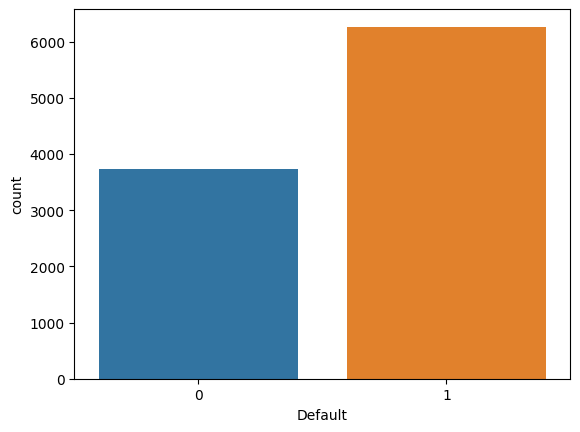

In [ ]:
sns.countplot(x = "Default", data = TARGET)
print(TARGET.groupby("Default").size().sort_values())

Para este caso el máximo de días permitidos son 10 y mas de la mitad de los clientes han superado este límite de días, las accionas a tomar dependeran mucho de el origen de la base y de cual es la intención/ojetivo de la entidad al hacer este análisis.

## Analisis Univariante

Nuestras variables se encuentran bastante dispersas ya que si hacemos comparaciones por ejemplo entre la edad que son números de 18 a 92 y la cantidad de productos que una persona tiene que van de 1 a 4, las diferencias son muy amplias, y ni hablar de la diferencia entre el salario estimado y el genero, es por eso que haremos un escalado de los datos.

In [ ]:
TARGET_esc = TARGET.copy()
TARGET_esc = TARGET_esc.drop("Surname", axis = 1) #Quitamos la variable que no convertimos en int, puesto que no es util y no se puede escalar

Primero hacemos una visualización de los datos sin escalarlos con la función sns.kdeplot para graficar la densidad.

<Axes: ylabel='Density'>

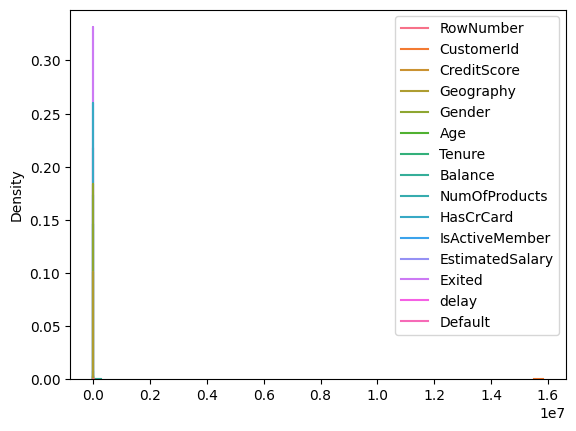

In [ ]:
sns.kdeplot(data = TARGET_esc)

Estos datos se encuentran demasiado dispersos para poder realizar un análisis, por lo que procederemos a igualar las manitudes

In [ ]:
TARGET_esc.shape

(10000, 15)

In [ ]:
array= TARGET_esc.values
X_class = array[ : , 0:15]
Y_class = array[ : , 14]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

array= TARGET_esc.values
X_class = array[ : , 0:15]
Y_class = array[ : , 14]

features = X_class

scaler = MinMaxScaler(feature_range = (0,1)) #Creamos la variable Scaler y luego escalamos los datos en un rango de 0 y 1
rescaldedx = scaler.fit_transform(features) #Generamos el objeto Scaler, para luego ajustar y transformar

In [ ]:
columns = list(TARGET_esc.columns)
columns

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'delay',
 'Default']

In [ ]:
TARGET_esc2 = pd.DataFrame(data=rescaldedx, columns=['RowNumber', 'CustomerId','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited','delay','Default'])
TARGET_esc2 = TARGET_esc2.drop('CustomerId', axis=1) #Customer ID no presenta ningun información relevante puesto que es un dato único
TARGET_esc2 = TARGET_esc2.drop('HasCrCard', axis=1) #HasCrCard no es relevante pues que todos los valores son 1
TARGET_esc2


,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,delay,Default
0,0.0000,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,0.506735,1.0,0.09,0.0
1,0.0001,0.516,0.5,0.0,0.310811,0.1,0.334031,0.000000,1.0,0.562709,0.0,0.05,0.0
2,0.0002,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,0.0,0.569654,1.0,0.16,1.0
3,0.0003,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.469120,0.0,0.15,1.0
4,0.0004,1.000,0.5,0.0,0.337838,0.2,0.500246,0.000000,1.0,0.395400,0.0,0.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.9996,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,0.0,0.481341,0.0,0.15,1.0
9996,0.9997,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,0.508490,0.0,0.33,1.0
9997,0.9998,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,1.0,0.210390,1.0,0.11,1.0
9998,0.9999,0.844,1.0,1.0,0.324324,0.3,0.299226,0.333333,0.0,0.464429,1.0,0.15,1.0


Volvemos a hacer un grafico para ver como estan ahora nuestros datos

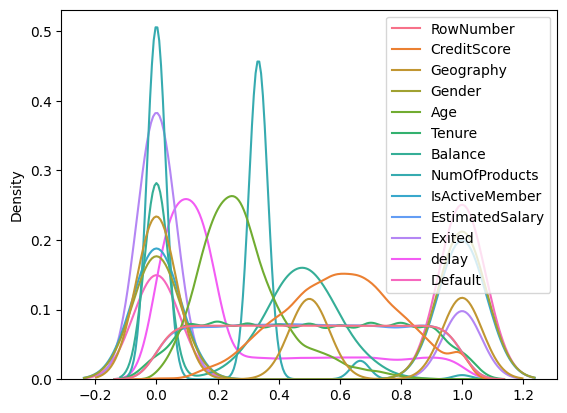

In [ ]:
sns.kdeplot(data = TARGET_esc2)
plt.show()

Los datos ya han sido escalados, por lo que las densidades son apreciables y comparables entre si mismas, de esta forma ya es posible hacer un analisis a partir de ellos y se puede determinar mejor cual es la interacción entre ellos

<ipython-input-31-3cac4ed82db0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  TARGET_esc2.plot(ax = ax, kind = "density" , subplots = True, layout =(5,4), sharex = False)


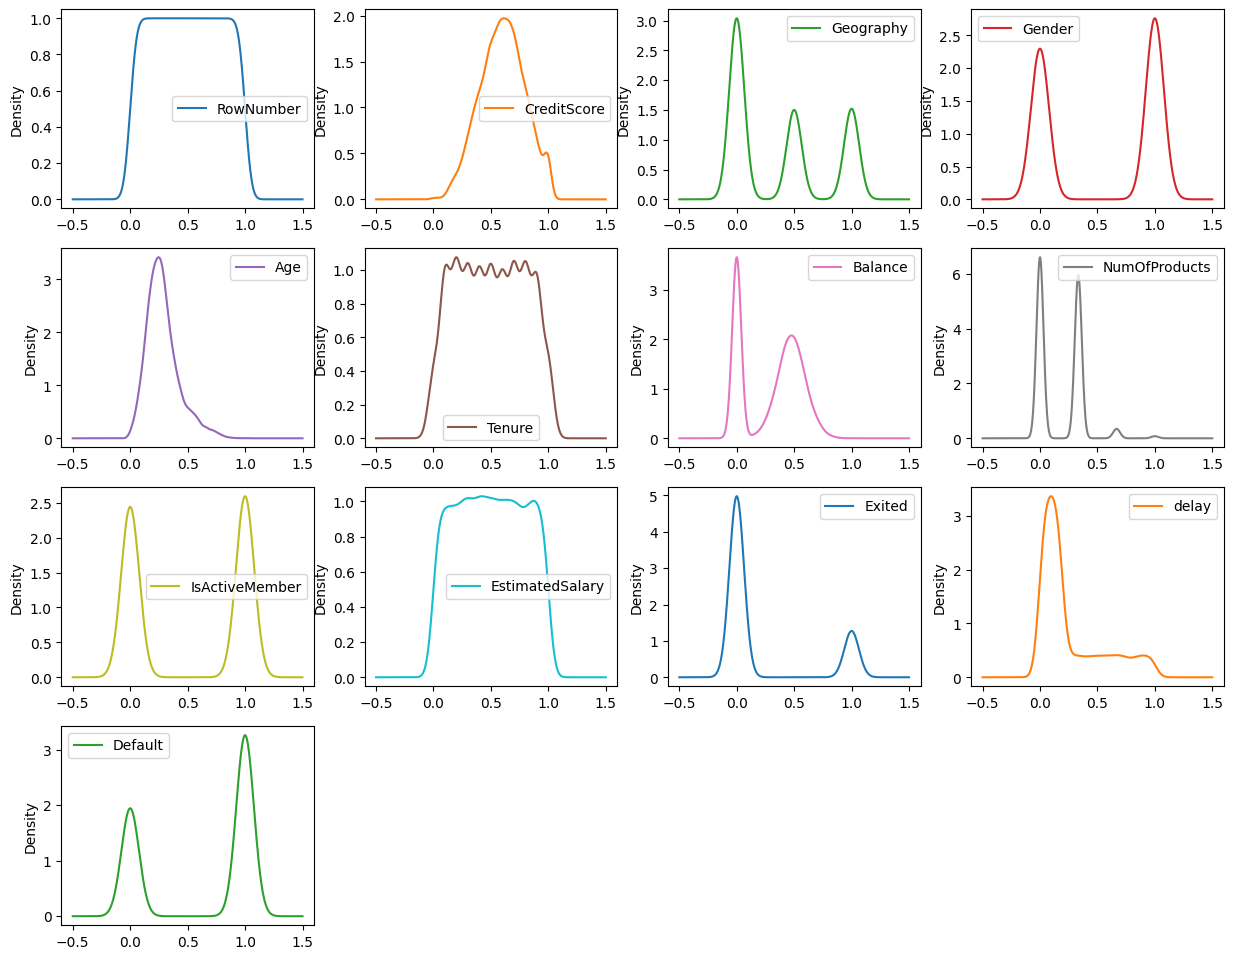

In [ ]:
fig = plt.figure(figsize =(15,15))
ax = fig.gca()
TARGET_esc2.plot(ax = ax, kind = "density" , subplots = True, layout =(5,4), sharex = False)
plt.show()

Como se analizo antes, el salario esta igualmente distribuido, en datos categoricos los graficos tienen picos para valores especificos como 1, 0, 0.5 o tambien muestran una distribucion igual, pues son valores únicos. El balance con excepción del valor 0 podemos decir que tiene distribución normal y la calificación crediticia tambien la tiene.

In [ ]:
Target_array = pd.DataFrame(data=Y_class,columns=["Default"])
consolidado = pd.concat([TARGET_esc2], axis= 1)
consolidado = consolidado.drop('RowNumber', axis=1)
consolidado



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,delay,Default
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,0.506735,1.0,0.09,0.0
1,0.516,0.5,0.0,0.310811,0.1,0.334031,0.000000,1.0,0.562709,0.0,0.05,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,0.0,0.569654,1.0,0.16,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.469120,0.0,0.15,1.0
4,1.000,0.5,0.0,0.337838,0.2,0.500246,0.000000,1.0,0.395400,0.0,0.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,0.0,0.481341,0.0,0.15,1.0
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,0.508490,0.0,0.33,1.0
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,1.0,0.210390,1.0,0.11,1.0
9998,0.844,1.0,1.0,0.324324,0.3,0.299226,0.333333,0.0,0.464429,1.0,0.15,1.0


In [ ]:
cols = consolidado.columns.tolist()
cols

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'delay',
 'Default']

<ipython-input-34-108b436dbf9c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  consolidado.plot( ax=ax , kind = "box" , subplots = True, layout =(6,5) ,sharex = False)


CreditScore            Axes(0.125,0.77;0.133621x0.11)
Geography           Axes(0.285345,0.77;0.133621x0.11)
Gender               Axes(0.44569,0.77;0.133621x0.11)
Age                 Axes(0.606034,0.77;0.133621x0.11)
Tenure              Axes(0.766379,0.77;0.133621x0.11)
Balance               Axes(0.125,0.638;0.133621x0.11)
NumOfProducts      Axes(0.285345,0.638;0.133621x0.11)
IsActiveMember      Axes(0.44569,0.638;0.133621x0.11)
EstimatedSalary    Axes(0.606034,0.638;0.133621x0.11)
Exited             Axes(0.766379,0.638;0.133621x0.11)
delay                 Axes(0.125,0.506;0.133621x0.11)
Default            Axes(0.285345,0.506;0.133621x0.11)
dtype: object

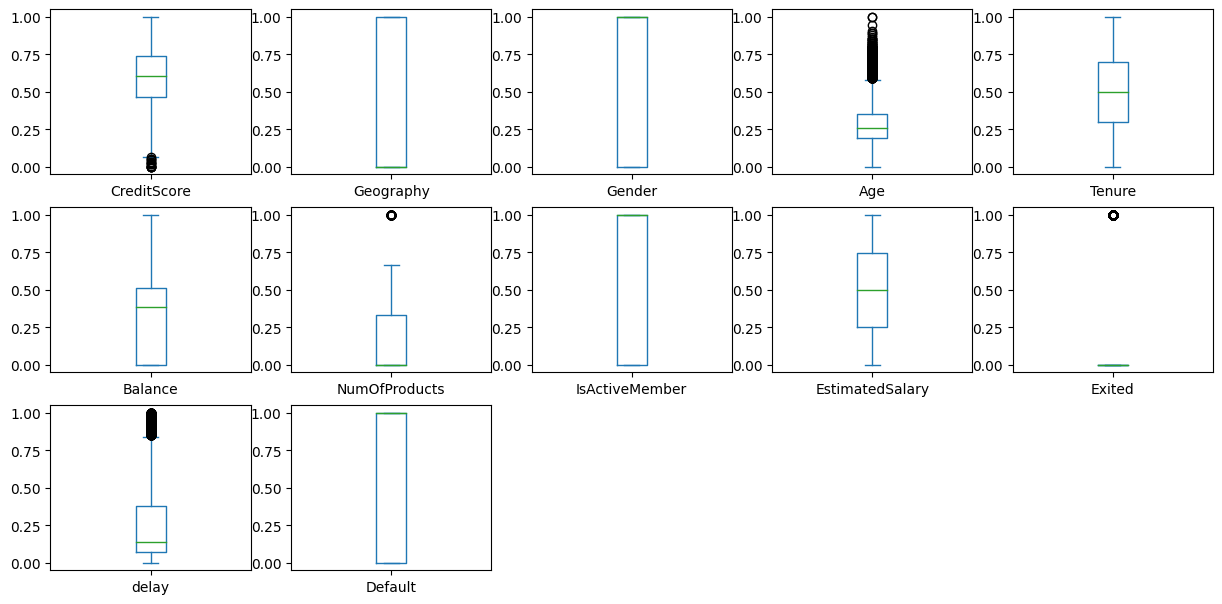

In [ ]:
fig = plt.figure(figsize =(15,15))
ax = fig.gca()
consolidado.plot( ax=ax , kind = "box" , subplots = True, layout =(6,5) ,sharex = False)

## **Análisis multivariado**
Ahora veremos que tan relacionadas estan las variables entre si, el valor mas favorable es cuando las variables no estan correlacionadas, de esta forma el análisis a realizar sera mucho mas adecuado. Utilizaremos el metodo de pearson y funciones de python para analizar la correlación

In [ ]:
Correl = consolidado.copy()
correlacion = Correl.corr(method = 'pearson')
correlacion

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,delay,Default
CreditScore,1.000000,0.008267,-0.002857,-0.003965,0.000842,0.006268,0.012238,0.025651,-0.001384,-0.027094,0.008129,-0.000202
Geography,0.008267,1.000000,-0.016936,0.048092,0.001418,0.348700,-0.006180,-0.012692,0.007382,0.153771,-0.014853,-0.022371
Gender,-0.002857,-0.016936,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.022544,-0.008112,-0.106512,0.009859,0.000305
Age,-0.003965,0.048092,-0.027544,1.000000,-0.009997,0.028308,-0.030680,0.085472,-0.007201,0.285323,-0.019257,-0.015417
Tenure,0.000842,0.001418,0.014733,-0.009997,1.000000,-0.012254,0.013444,-0.028362,0.007784,-0.014001,0.000499,-0.006017
Balance,0.006268,0.348700,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.010084,0.012797,0.118533,-0.005336,-0.014823
NumOfProducts,0.012238,-0.006180,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.009612,0.014204,-0.047820,0.009016,0.032992
IsActiveMember,0.025651,-0.012692,0.022544,0.085472,-0.028362,-0.010084,0.009612,1.000000,-0.011421,-0.156128,-0.013864,-0.002724
EstimatedSalary,-0.001384,0.007382,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.011421,1.000000,0.012097,0.009990,0.003040
Exited,-0.027094,0.153771,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.156128,0.012097,1.000000,-0.003269,-0.006147


In [ ]:
Correl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  float64
 2   Gender           10000 non-null  float64
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   IsActiveMember   10000 non-null  float64
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  float64
 10  delay            10000 non-null  float64
 11  Default          10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


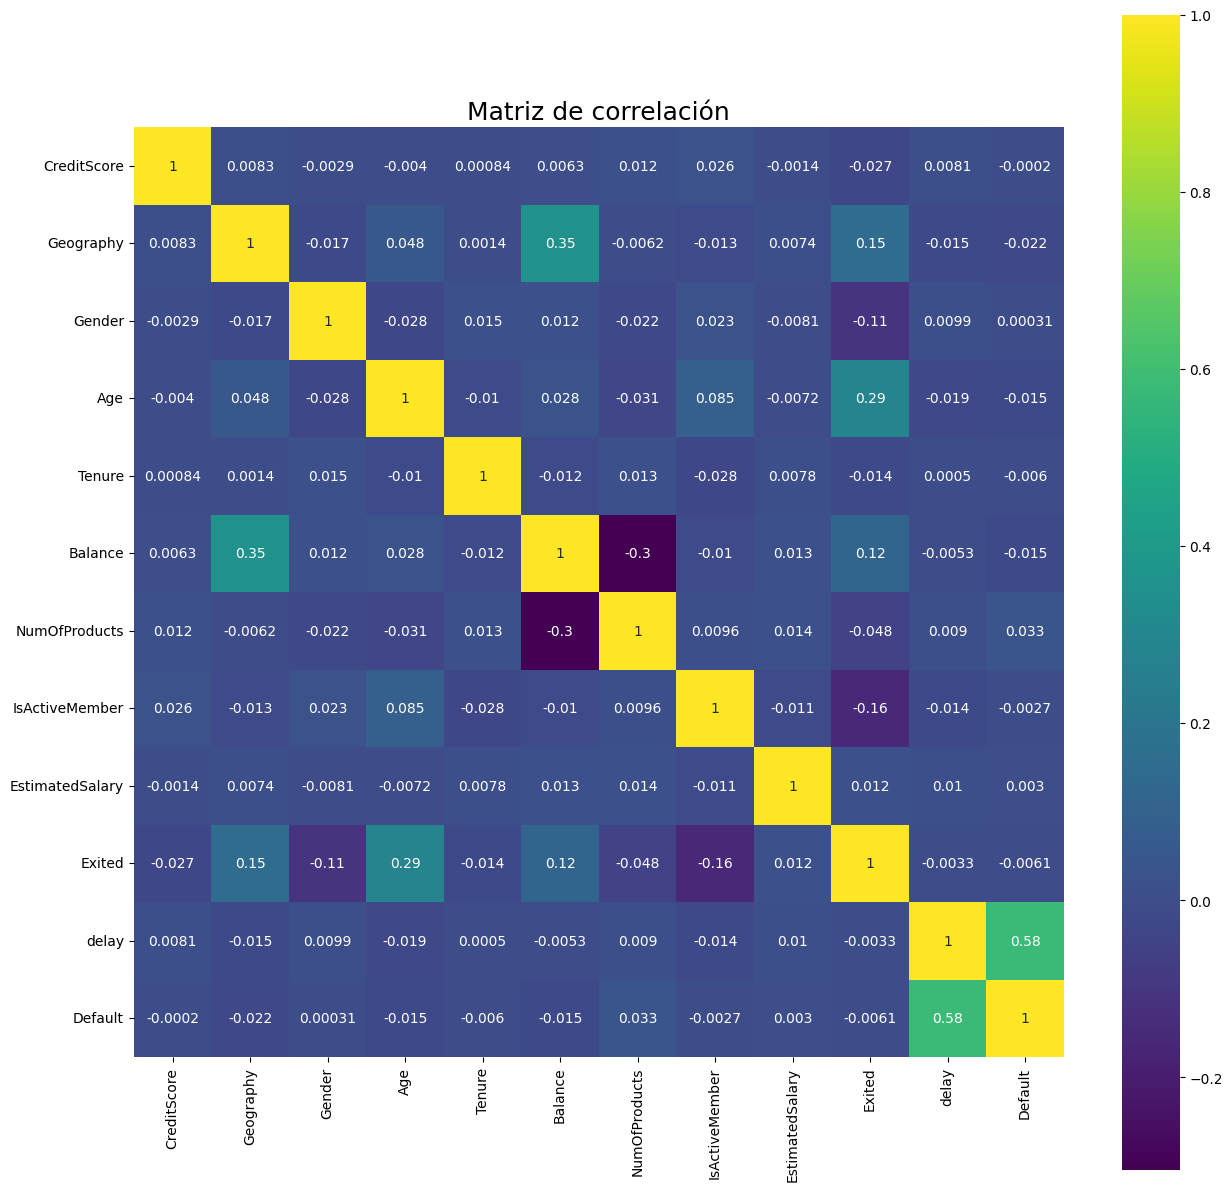

In [ ]:
correlation = Correl.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = "viridis")
plt.title("Matriz de correlación", fontsize = 18)
plt.show()

De inicio vemos que las unicas variables relacionadas son delay y Default pero tiene todo el sentido puesto que Default viene sacada directamente de delay.


Las variables con mayor correlación son la edad con que tan propensos son los clientes a mantener su cuenta y el balance con la ubicación, pero no son números tan grandes por lo tanto no hay mucho de que preocuparse. Para un proceso de ingeniería de datos podriar omitir alguno de estos valores y por ejemplo trabajar con delay y Age que tienen correlación muy baja


In [ ]:
relevante_features = correlation[correlation > 0.15]
relevante_features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,delay,Default
CreditScore,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Geography,NaN,1.000000,NaN,NaN,NaN,0.3487,NaN,NaN,NaN,0.153771,NaN,NaN
Gender,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.285323,NaN,NaN
Tenure,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,NaN,0.348700,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN
NumOfProducts,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
IsActiveMember,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
EstimatedSalary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Exited,NaN,0.153771,NaN,0.285323,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


Como podemos ver aquí, hay muy pocas variables que la interacción entre ellas rebase el valor 0.15.
Ahora veremos la interacción que cada una tiene con la variable objetivo que es "Default"

In [ ]:
cor_target = abs(correlation["Default"])
cor_target

CreditScore        0.000202
Geography          0.022371
Gender             0.000305
Age                0.015417
Tenure             0.006017
Balance            0.014823
NumOfProducts      0.032992
IsActiveMember     0.002724
EstimatedSalary    0.003040
Exited             0.006147
delay              0.581244
Default            1.000000
Name: Default, dtype: float64

La relación que tienen con las variables es bastante pequeña por lo tanto no es conveniente eliminar alguna otra variable aparte de delay

## Selección de mejores características

No para todos los modelos todas las variables son las que mejor van a explicar el modelo y mejor se van a ajustar a el, por eso debemos seguir un proceso de elección de variables puesto que hay algunas de ellas que favorecen el modelo y hay otras que al contrario, lo llegan a distorcionar. Aquí veremos que variable tiene una relación mayor a 0.07


In [ ]:
cor_target = abs(correlation["Default"])
relevant_features = cor_target[cor_target>0.07]
relevant_features

delay      0.581244
Default    1.000000
Name: Default, dtype: float64

La única variable con una correlación amplia con Default es delay, de hecho es muy grande este valor, por lo que se omitira para que podamos ver mejor cuales de las otras variables tiene peso en la explicación de la variable objetivo.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [ ]:
Cred_features = consolidado.copy()
array = Cred_features.values
X_class = array[ : , 0:9]
Y_class = array[ : , 9]

Usando el metodo de Machine Learning se utilizan arboles de decisiones, este proceso consiste en tomar todas las variables y eliminar 1, procesa el modelo y mide el nivel de precisión, despues iteran y se vuelve a hacer el proceso para al final mostrar un resultado de que variables son las que explican mejor el modelo.

Omitiremos las ultimas 2 variables pues como lo vimos antes estan ampliamente relacionadas, y si las metemos al modelo este solo nos mostrara que "delay" es la variable que explica el modelo.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_class, Y_class,
                                                     test_size = 0.3, random_state= 7)

depth = 5
tree = DecisionTreeRegressor(criterion = "squared_error", max_depth = depth)
tree.fit(X_train, Y_train)
#Extraemos los indices de las variables utilizadas.
subset = np.unique(tree.tree_.feature[tree.tree_.feature >= 0])
print(f"Variables: {X_class.shape[1]}")
print(f"Variables utilizadas: {subset}")
print(f"Training: {tree.score(X_train, Y_train).round(4)}")
print(f"Test: {tree.score(X_test, Y_test).round(4)}")

Variables: 9
Variables utilizadas: [0 1 3 4 5 6 7 8]
Training: 0.3441
Test: 0.3034


Los resutados nos dicen que las variables utilizadas fueron CreditScore, Geography, Age, Tenure, Balance, NumofProducts, IsActiveMemer y Estimaded Salary, la interpretación es que estas son las variables que mejor explican el modelo, con un valor $R^{2}$ de entrenamiento de 0.3441, eso quiere decir que el modelo explica en un 34% la variabilidad en la variable objetivo en el conjunto de entrenamiento. Y con un valor $R^{2}$ de Test de 0.3034 para el conjunto de prueba. Por lo tanto no hay tanto variabilidad entre ambos.  

Ahora veremos en una gráfica como estan estas variables distribuidas

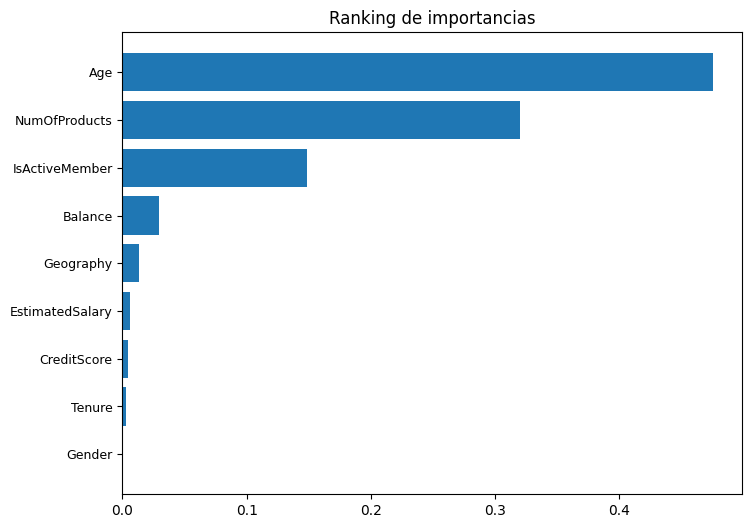

In [ ]:
import matplotlib.pyplot as plt
ranking = np.argsort(tree.feature_importances_)
plt.figure( figsize = (8,6))
plt.title("Ranking de importancias")
plt.barh(range(X_class.shape[1]), tree.feature_importances_[ranking])
plt.yticks(range(X_class.shape[1]), Cred_features.columns[ranking], fontsize = 9)
plt.show()

Estas son las variables que mejor explican el modelo y las barras muestran su nivel de importancia. pero como lo vimos númericamente, la diferencia no es muy ámplia, por lo que ocuparemos todas las variables para la creación del modelo.
## Selección y validación del modelo
Usaremos todas las variables puesto que no hay alguna tremendamente buena ni alguna que sea mala.

Ahora usaremsos LogisticRegression para entrenar un modelo de regresión logística y evaluar su precisión en un conjunto de prubea,

In [ ]:
Creditfeatures = consolidado.copy()
array = Creditfeatures.values
X_class = array[ : , 0:9]
Y_class = array[ : , 9]
X_train, X_test, Y_train, Y_test = train_test_split(X_class, Y_class,
                                                     test_size = 0.2, random_state= 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

testsize = 0.33 #Proporción del conjunto de prueba
seed = 7

# Creamos el objeto model, usamos lbfgs para optimización y un máximo número de iteraciones de 1000.
model = LogisticRegression(solver="lbfgs", max_iter=1000)

#ajustamos el modelo de regresión a el entrenamiento

model.fit(X_train, Y_train)

#ajustamos el modelo a los resultados para ver que tal es este
results = model.score(X_test, Y_test)
print(f"Precisión del Regresor Logístico: {results*100.0:.2f}%")

Precisión del Regresor Logístico: 81.20%


Al generar nuestro modelo, podemos ver que tiene una precisión del 81.20%, con esto podemos decir que un modelo logìstico puede explicar de buena manera nuestro modelo y clasificaría en gran medida nuestros datos.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


Intentaremos con otros modelos para ver el nivel de precisión y comparar los resultados respecto al analisis de los datos. Los modelos a usar son el de Regresión Logística,Vecinos cercanos, Maquinas de soporte vectorial y modelo Naive Bayes

In [ ]:
models = []
models.append(("LoR", LogisticRegression (solver = "lbfgs", max_iter= 1000)))
models.append(("K-NN", KNeighborsClassifier()))
models.append(("SVC", SVC(gamma="auto")))
models.append(("NB", GaussianNB()))


In [ ]:
results = []
names = []
scoring = "accuracy"
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model,X_class,Y_class, cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)

  print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LoR: 81.25% (0.85%)
K-NN: 82.39% (0.74%)
SVC: 80.09% (1.19%)
NB: 83.02% (0.72%)


Así vemos que las precisiones son 81.25% para Regresión Logística, 82.39% Vecinos cercanos, 79.77% Maquinas de soporte vectorial y 83.02% modelo Naive Bayes, por lo tanto el mejor modelo para predecir cuales de nuestras clientes caeran en Default y cuales no es el modelo de Naive Bayes

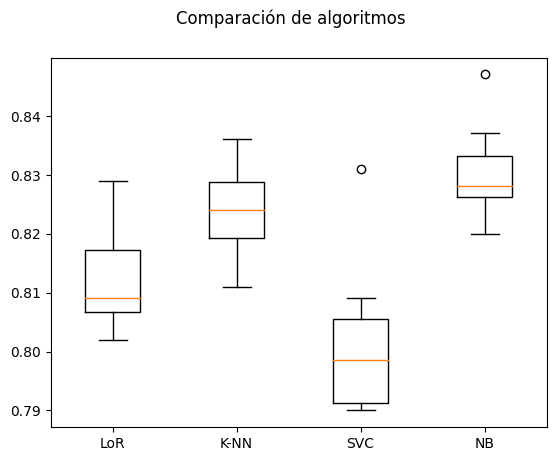

In [ ]:
fig = plt.figure()
fig.suptitle("Comparación de algoritmos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


De aquí el siguiente paso sería para este caso hacer un modelo Bayesiano para predecir la probabilidad de caer en "Default" y aplicarlo a datos donde ya sabemos si el cliente cayo en Default o no y compararlo con los datos reales para ver si de verdad el modelo hace lo que se espera.